In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import random

#nltk.download('punkt')
#nltk.download('stopwords')
column_names = ['sentiment', 'ids', 'date','flag','user','text']  # 원하는 컬럼 이름으로 변경
"""
    target: 트윗의 감정(부정적은 0, 중립은 2, 긍정적은 1)
    ids: id
    date: (Sat May 16 23:58:44 UTC 2009)
    flag: 쿼리( lyx ). 쿼리가 없으면 이 값은 NO_QUERY (robotickilldozr)
    user:
    text: 
"""
data="/Users/admin/Documents/GitHub/softeer_wiki/missions/w2/training.1600000.processed.noemoticon.csv"
data=pd.read_csv(data, encoding='cp1252', names=column_names)
data = data[['sentiment','text']]
data['sentiment'] = data['sentiment'].replace(4,1)
data.head(2)

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...


### 프로세스를 펼쳐서 결과를 그래프로도 출력하세요.

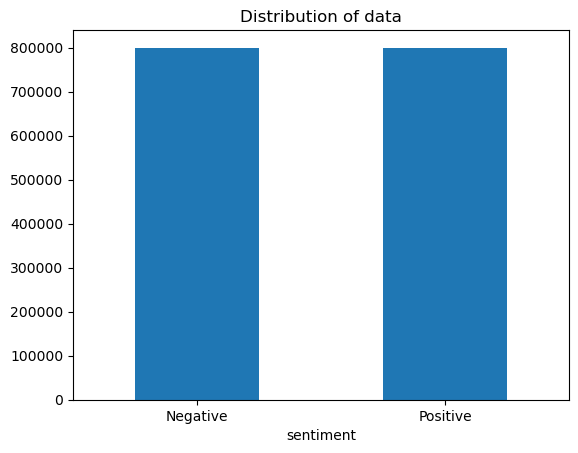

In [45]:
ax = data.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists.
text, sentiment = list(data['text']), list(data['sentiment'])

### 긍정적 감정, 부정적 감정에 각각 해당하는 단어를 모아서 워드 클라우드를 사용하세요.
Word Cloud를 만들 때 사용할 단어들은 샘플링을 통해서 더욱 편리합니다.

하나의 단어 클라우드에는 최대 200개의 단어만 표시하세요.

In [46]:
positive_tweets = data[data['sentiment'] == 1]['text']
negative_tweets = data[data['sentiment'] == 0]['text']

positive_tweets

800000          I LOVE @Health4UandPets u guys r the best!! 
800001     im meeting up with one of my besties tonight! ...
800002     @DaRealSunisaKim Thanks for the Twitter add, S...
800003     Being sick can be really cheap when it hurts t...
800004       @LovesBrooklyn2 he has that effect on everyone 
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 800000, dtype: object

In [47]:
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_words = [word for word in word_tokens if word.isalnum() and word.lower() not in stop_words]
    return ' '.join(filtered_words)

positive_tweets = positive_tweets.apply(preprocess_text)
negative_tweets = negative_tweets.apply(preprocess_text)

positive_tweets

800000                    LOVE Health4UandPets u guys r best
800001     im meeting one besties tonight Cant wait GIRL ...
800002     DaRealSunisaKim Thanks Twitter add Sunisa got ...
800003     sick really cheap hurts much eat real food Plu...
800004                        LovesBrooklyn2 effect everyone
                                 ...                        
1599995                        woke school best feeling ever
1599996                   cool hear old Walt interviews http
1599997                      ready MoJo Makeover Ask details
1599998    Happy 38th Birthday boo alll time Tupac Amaru ...
1599999    happy charitytuesday theNSPCC SparksCharity Sp...
Name: text, Length: 800000, dtype: object

In [48]:
positive_tweets.info()

<class 'pandas.core.series.Series'>
Index: 800000 entries, 800000 to 1599999
Series name: text
Non-Null Count   Dtype 
--------------   ----- 
800000 non-null  object
dtypes: object(1)
memory usage: 12.2+ MB


In [49]:
text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", ' ',
                  positive_tweets)  # http로 시작되는 url
text = re.sub(r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{2,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", ' ',
                  positive_tweets)  # http로 시작되지 않는 url
from keras.preprocessing.text import Tokenizer                  
token=Tokenizer(lower=False,  split=' ', filters='!@#$%^&*()[]<>,.?\"\'■…▶·◆‘’◇“”ⓒ【】=@<b></b>quot;apos')

TypeError: expected string or bytes-like object, got 'Series'

In [43]:
positive_text = ' '.join(positive_tweets)
negative_text = ' '.join(negative_tweets)

def get_top_n_words(text, n=200):
    words = text.split()
    word_freq = Counter(words)
    most_common_words = word_freq.most_common(n)
    return dict(most_common_words)

positive_top_words = get_top_n_words(positive_text)
negative_top_words = get_top_n_words(negative_text)
positive_top_words

{'http': 47140,
 'good': 47106,
 'quot': 45931,
 'day': 41154,
 'love': 39038,
 'like': 36050,
 'get': 33089,
 'u': 27806,
 'got': 27629,
 'today': 27332,
 'time': 27296,
 'amp': 26272,
 'going': 25493,
 'go': 25359,
 'know': 24949,
 'one': 24244,
 'see': 23698,
 'lol': 22758,
 'new': 22751,
 'back': 21336,
 'great': 21282,
 'night': 20360,
 'think': 18703,
 'thanks': 18689,
 'work': 18511,
 'well': 18038,
 'fun': 17137,
 'really': 16802,
 'haha': 16648,
 '2': 16216,
 'much': 16063,
 'na': 16015,
 'morning': 15851,
 'Thanks': 15289,
 'im': 15072,
 '3': 14712,
 'home': 14403,
 'nice': 14103,
 'tomorrow': 13861,
 'would': 13706,
 'Good': 13655,
 'hope': 13369,
 'wait': 13321,
 'happy': 13201,
 'twitter': 12504,
 'need': 12490,
 'still': 12250,
 'last': 11919,
 'way': 11856,
 'better': 11842,
 'want': 11822,
 'make': 11718,
 'right': 11697,
 'awesome': 11693,
 'tonight': 11684,
 'lt': 11593,
 'watching': 10560,
 'come': 10527,
 'ca': 10521,
 'LOL': 9694,
 'best': 9620,
 'people': 9587,
 '

In [42]:
positive_df = pd.DataFrame(positive_top_words.items(), columns=['Word', 'Frequency'])
negative_df = pd.DataFrame(negative_top_words.items(), columns=['Word', 'Frequency'])
positive_df

,Word,Frequency
0,e,4529373
1,o,3806854
2,t,3692616
3,a,3465567
4,i,2865671
...,...,...
185,Ç,3
186,Í,2
187,Ò,2
188,ß,1


In [ ]:
positive_df = pd.DataFrame(positive_top_words.items(), columns=['Word', 'Frequency'])
negative_df = pd.DataFrame(negative_top_words.items(), columns=['Word', 'Frequency'])
positive_df

# Master

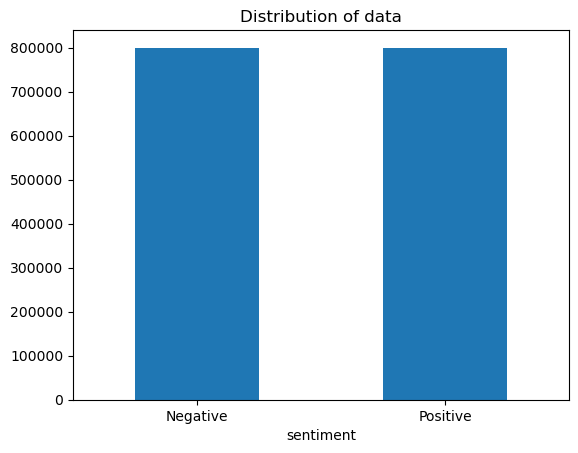

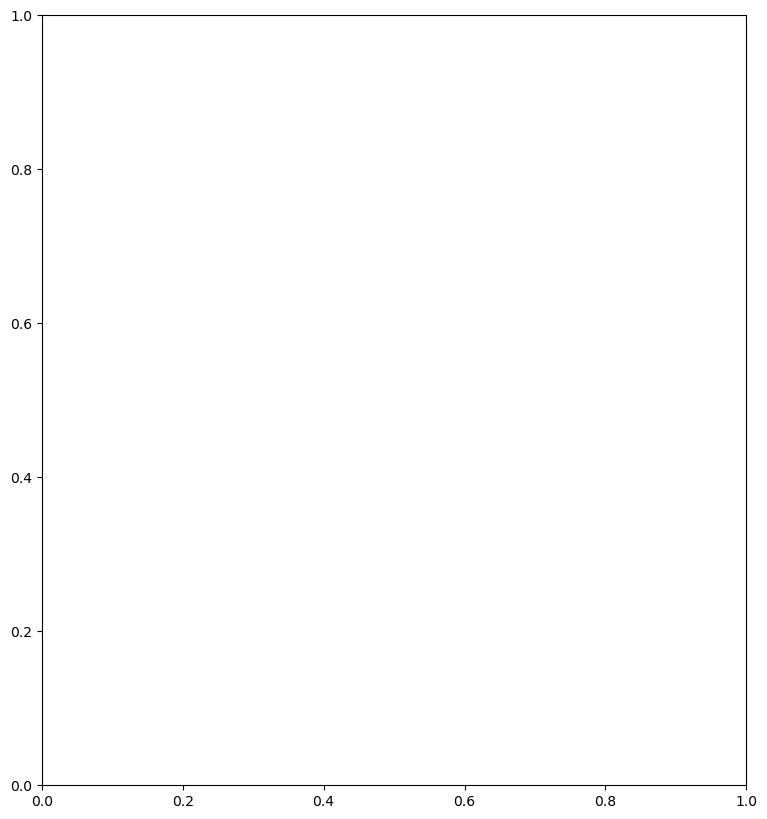

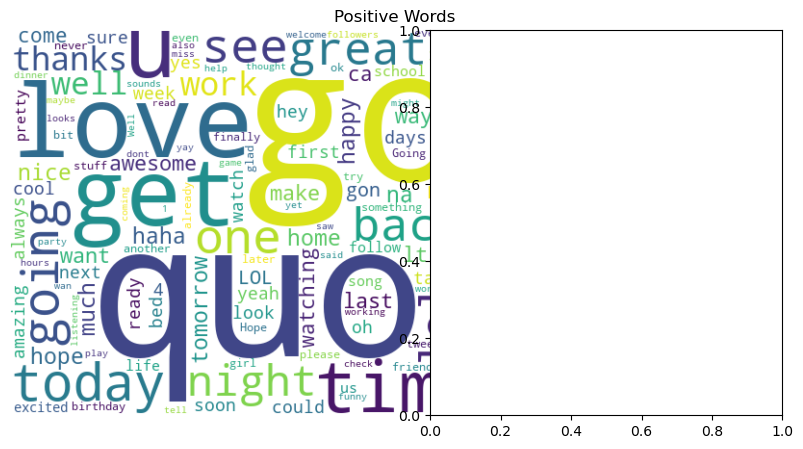

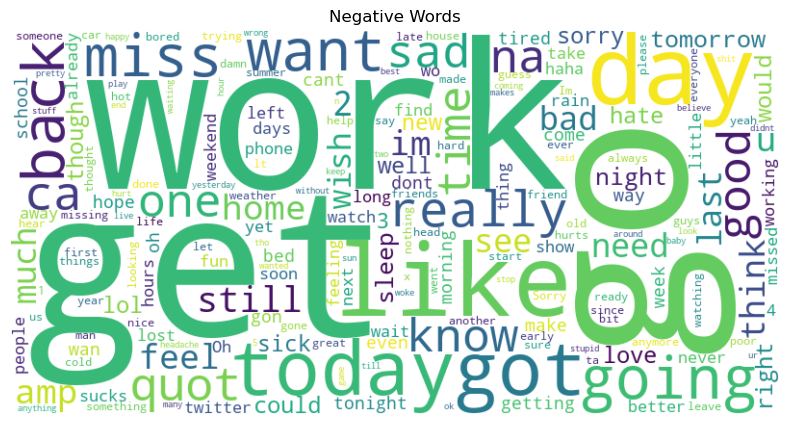

   Word  Frequency
0  good      46503
1  quot      45862
2   day      40738
3  love      38758
4  like      35887
   Word  Frequency
0   get      44395
1    go      43806
2  work      42396
3  like      39737
4   day      35966


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import re
from tensorflow.keras.preprocessing.text import Tokenizer

# nltk 다운로드 (최초 1회만 필요)
# nltk.download('punkt')
# nltk.download('stopwords')

# 데이터 로드
column_names = ['sentiment', 'ids', 'date', 'flag', 'user', 'text']
data_path = "/Users/admin/Documents/GitHub/softeer_wiki/missions/w2/training.1600000.processed.noemoticon.csv"
data = pd.read_csv(data_path, encoding='cp1252', names=column_names)

# 필요한 컬럼만 추출
data = data[['sentiment', 'text']]
data['sentiment'] = data['sentiment'].replace(4, 1)

# 감정별 데이터 분포 시각화
ax = data.groupby('sentiment').count().plot(kind='bar', title='Distribution of data', legend=False)
ax.set_xticklabels(['Negative', 'Positive'], rotation=0)

# 데이터 전처리 함수
def preprocess_text(text):
    # URL 제거
    text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", ' ', text)
    text = re.sub(r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{2,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", ' ', text)
    # 불용어 제거 및 토큰화
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_words = [word for word in word_tokens if word.isalnum() and word.lower() not in stop_words]
    return ' '.join(filtered_words)

# 긍정 및 부정 트윗 전처리
positive_tweets = data[data['sentiment'] == 1]['text'].apply(preprocess_text)
negative_tweets = data[data['sentiment'] == 0]['text'].apply(preprocess_text)

# 상위 단어 추출 함수
def get_top_n_words(text, n=200):
    words = text.split()
    word_freq = Counter(words)
    most_common_words = word_freq.most_common(n)
    return dict(most_common_words)

# 긍정 및 부정 트윗의 상위 단어 추출
positive_text = ' '.join(positive_tweets)
negative_text = ' '.join(negative_tweets)

positive_top_words = get_top_n_words(positive_text)
negative_top_words = get_top_n_words(negative_text)

# 워드클라우드 생성
def create_wordcloud(word_freq_dict, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')

# 두 개의 워드 클라우드를 하나의 플롯에 그리기
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
create_wordcloud(positive_top_words, 'Positive Words')

plt.subplot(1, 2, 2)
create_wordcloud(negative_top_words, 'Negative Words')

plt.show()

# 단어 토큰화
token = Tokenizer(lower=False, split=' ', filters='!@#$%^&*()[]<>,.?\"\'■…▶·◆‘’◇“”ⓒ【】=@<b></b>quot;apos')

# 워드클라우드 데이터프레임 생성
positive_df = pd.DataFrame(positive_top_words.items(), columns=['Word', 'Frequency'])
negative_df = pd.DataFrame(negative_top_words.items(), columns=['Word', 'Frequency'])

# 데이터프레임 출력 (옵션)
print(positive_df.head())
print(negative_df.head())
